In [4]:
#importing libraries

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

C:\Users\Jalon\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Jalon\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## QN2
Find a data set to work and import it into your Jupyter notebook. Ensure that this data somehow connects to the broader research topic for your Achievement project. The best data set would be one that shares a common key with your main data set, such as a geographic component, so you can merge the data, but this could be difficult to find, so it’s not a requirement.


In [6]:
# Configure API key 

quandl.ApiConfig.api_key = 'NNrLZyPy7aAmHQAoNsjF'

In [34]:
# Importing S&P 500 Real Price by Month

data = quandl.get('MULTPL/SP500_REAL_PRICE_MONTH')

In [35]:
data.head()

,Value
Date,
1871-01-01,4.44
1871-02-01,4.50
1871-03-01,4.61
1871-04-01,4.74
1871-05-01,4.86


In [36]:
data.shape

(1853, 1)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1853 entries, 1871-01-01 to 2023-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   1853 non-null   float64
dtypes: float64(1)
memory usage: 29.0 KB


In [38]:
data.columns

Index(['Value'], dtype='object')

In [39]:
type(data)

pandas.core.frame.DataFrame

## QN3

Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example). Also, make sure your set doesn’t include any forecasted data.
In a markdown cell below the subset (if you make one), explain what logic you were following when selecting your data points.
Remember that if you subset your data, you’ll need to reset the index, subset, then reset the “Date” column as your index in the new dataframe.

In [40]:
data_2 = data.reset_index()

In [41]:
data_2

,Date,Value
0,1871-01-01,4.44
1,1871-02-01,4.50
2,1871-03-01,4.61
3,1871-04-01,4.74
4,1871-05-01,4.86
...,...,...
1848,2022-10-31,3871.98
1849,2022-11-01,3917.49
1850,2022-11-30,4080.11
1851,2022-12-01,3912.38


In [42]:
data_2["Date"].describe()

count                    1853
unique                   1853
top       1871-01-01 00:00:00
freq                        1
first     1871-01-01 00:00:00
last      2023-01-01 00:00:00
Name: Date, dtype: object

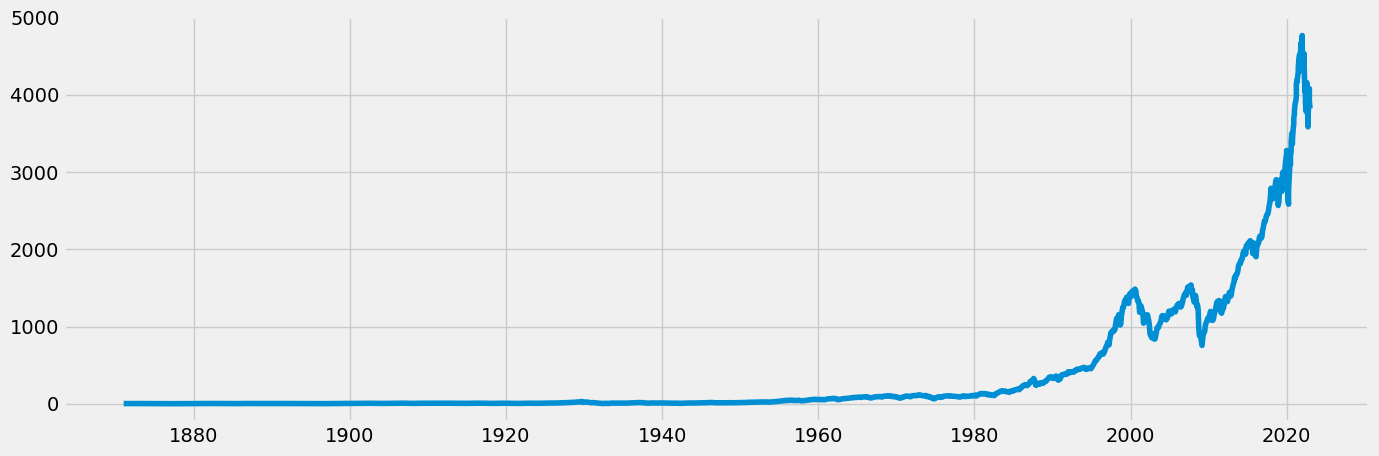

In [43]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

In [44]:
# creating a new subset from data where the date is more than 2010-1-1
data_sub = data_2.loc[(data_2['Date'] >= '2010-01-01')]

In [45]:
data_sub

,Date,Value
1668,2010-01-01,1123.58
1669,2010-02-01,1089.16
1670,2010-03-01,1152.05
1671,2010-04-01,1197.32
1672,2010-05-01,1125.06
...,...,...
1848,2022-10-31,3871.98
1849,2022-11-01,3917.49
1850,2022-11-30,4080.11
1851,2022-12-01,3912.38


In [46]:
data_sub.shape

(185, 2)

Comment:

I have deleted all the data before 2010 since the regulations were different in those year as well as the economic and political conditions. I chose also not to consider the year 2008-2009 because of the crisis. And so i there won't be data incorrectly influencing my calculations

## QN4

Create a line chart of your data.

In [48]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
2010-01-01,1123.58
2010-02-01,1089.16
2010-03-01,1152.05
2010-04-01,1197.32
2010-05-01,1125.06


In [52]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=200)
plt.plot(data_sub)

In [54]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum() 

Value    0
dtype: int64

In [55]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

0

## QN 5

Decompose the data’s components.
Analyze the results from the plot in a markdown cell.

In [64]:
data_sub

,Value
datetime,
2010-01-01,1123.58
2010-02-01,1089.16
2010-03-01,1152.05
2010-04-01,1197.32
2010-05-01,1125.06
...,...
2022-10-31,3871.98
2022-11-01,3917.49
2022-11-30,4080.11


In [80]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='Multiplicative',period = 12) 

In [78]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

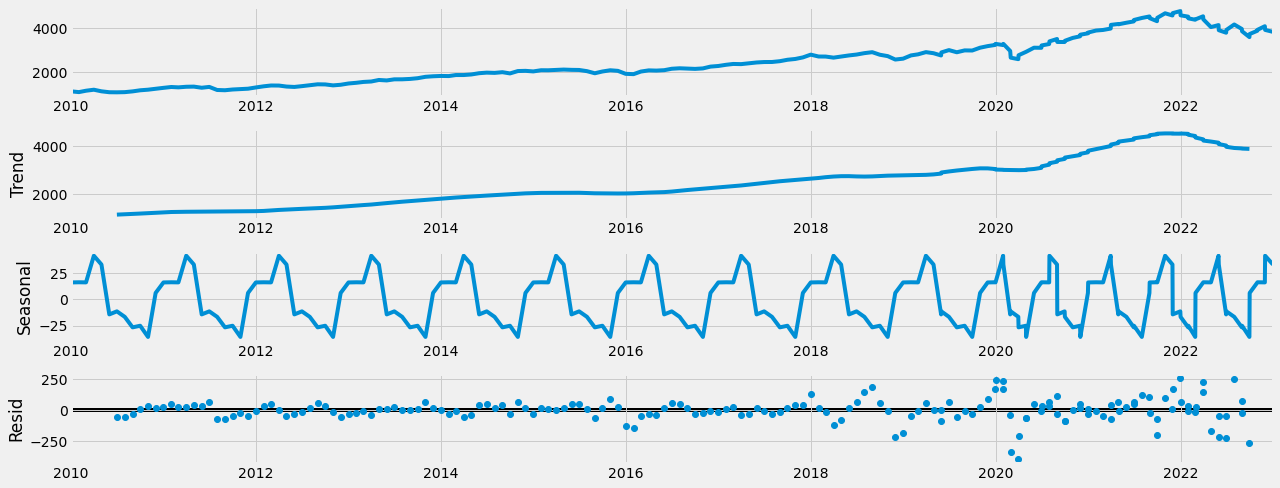

In [81]:
# Plot the separate components

decomposition.plot()
plt.show()

## QN6

Conduct a Dickey-Fuller test to check for stationarity.
Interpret the results in a markdown cell and reference your null hypothesis.

In [82]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -0.850556
p-value                          0.803819
Number of Lags Used              2.000000
Number of Observations Used    182.000000
Critical Value (1%)             -3.466800
Critical Value (5%)             -2.877555
Critical Value (10%)            -2.575308
dtype: float64


 The null hypothesis: presence of a unit root
 The alternative hypothesis is that there’s no unit root.
 
 
 --------------------------------------------------------------------------

 if :
 Test statistic larger than critical value = can’t reject null hypothesis
 
 Test statistic smaller than critical value = can reject null hypothesis
 
 
  --------------------------------------------------------------------------
  In this case we see the the 
  -0.850556>-2.877555--> can't reject null hypthesis ---> presence of a unit root --> non-stationairy

## Stationarizing the subdata

In [86]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [88]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [89]:
data_diff.head()

,Value
datetime,
2010-02-01,-34.42
2010-03-01,62.89
2010-04-01,45.27
2010-05-01,-72.26
2010-06-01,-41.70


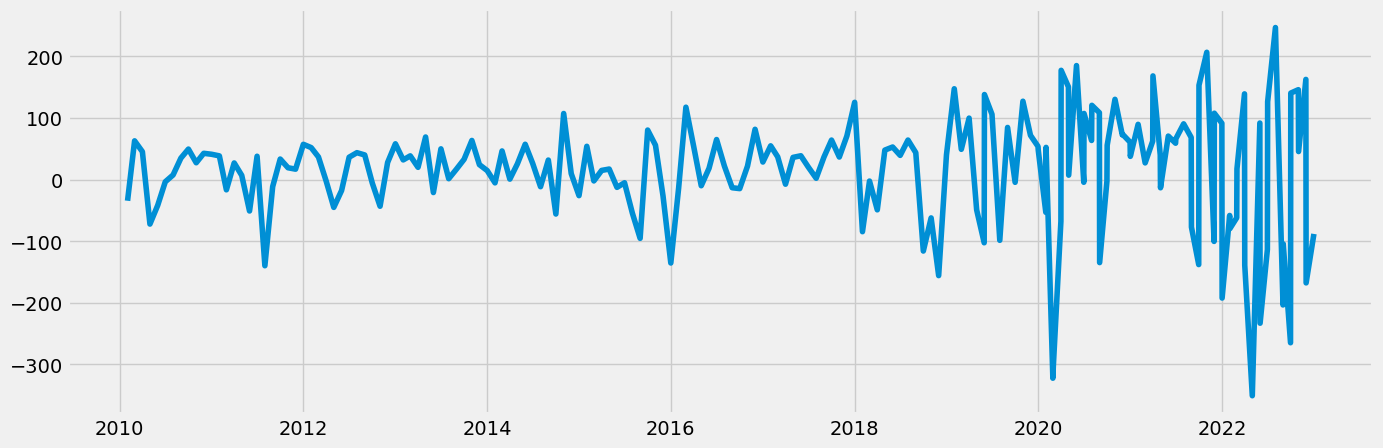

In [90]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [91]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -9.914966e+00
p-value                        3.097454e-17
Number of Lags Used            1.000000e+00
Number of Observations Used    1.820000e+02
Critical Value (1%)           -3.466800e+00
Critical Value (5%)           -2.877555e+00
Critical Value (10%)          -2.575308e+00
dtype: float64


##### Comment:
-9.914966e+00<2.575308e+00 --> We can reject the 0 hypothesis--> data_diff is stationary

## QN9

Check your data’s autocorrelations.

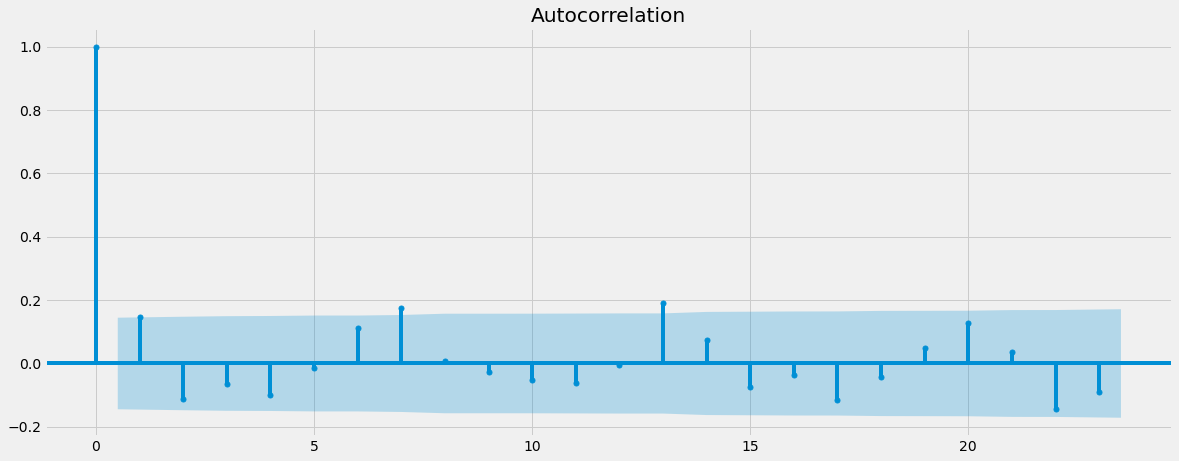

In [96]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_diff)
plt.show()

The vertical lines represent the lags in the series, while the blue area represents the confidence interval. When lines go above the blue edge of the confidence interval, this means you have lags that are significantly correlated with each other. And when you have many lags beyond this interval, you can deduce that your data is non-stationary.

We can see, that there are some 2 points above, but most of the lines are not above, which means we can consider, the data non stationary